На этот раз данные имеют следующую структуру:
- записываются для каждого пользователя, совершившего покупки, каждый день
- для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
- внутри каждой папки есть файл data.csv, где и хранятся данные

Схематично выглядит так:

└── data
<br>----├── 2020-12-30
<br>--------│  ├── FirstName_LastName
<br>------------│  │   └── data.csv
<br>----------------│  ├── FirstName_LastName2
<br>--------------------│  │   └── data.csv
<br>------------------------│  └── FirstName_LastName3
<br>----------------------------│      └── data.csv
<br>--------------------------------└── 2020-12-31
<br>------------------------------------├── FirstName_LastName1
<br>----------------------------------------│   └── data.csv
<br>--------------------------------------------└── FirstName_LastName5
<br>------------------------------------------------└── data.csv

Например, 30 декабря три покупателя сделали покупки, 31 – два (папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.
Note: данные в задании покрывают другой временной период, имена тоже другие.

Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)

In [49]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
os.getcwd()  # current working directory

'C:\\Users\\Nikolay\\jupyter_notebooks\\Karpov'

In [4]:
os.listdir('C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/')

['2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09']

In [5]:
os.listdir('C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-08/Alexey_Fedorov/')

['data.csv']

In [6]:
pd.read_csv("C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-08/Alexey_Fedorov/data.csv")

,Unnamed: 0,product_id,quantity
0,0,73,5
1,1,34,1
2,2,71,1
3,3,18,2
4,4,67,2


необходимо их собрать воедино, будем обходить все папки

In [7]:
path = "C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data"

In [8]:
os.walk(path)

<generator object _walk at 0x0000010681497CA0>

In [9]:
list(os.walk(path))

[('C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data',
  ['2020-12-03',
   '2020-12-04',
   '2020-12-05',
   '2020-12-06',
   '2020-12-07',
   '2020-12-08',
   '2020-12-09'],
  []),
 ('C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data\\2020-12-03',
  ['Alexey_Smirnov',
   'Anton_Petrov',
   'Kirill_Petrov',
   'Petr_Fedorov',
   'Vasiliy_Ivanov',
   'Vasiliy_Petrov'],
  []),
 ('C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data\\2020-12-03\\Alexey_Smirnov',
  [],
  ['data.csv']),
 ('C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data\\2020-12-03\\Anton_Petrov',
  [],
  ['data.csv']),
 ('C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data\\2020-12-03\\Kirill_Petrov',
  [],
  ['data.csv']),
 ('C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data\\2020-12-03\\Petr_Fedorov',
  [],
  ['data.csv']),
 ('C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data\\2020-12-03\\Vasiliy_Ivanov',
  [],
  ['data.csv']),
 ('C://123/usr/Karpov/Data_

In [10]:
for i in os.walk(path):
    print(i)
    break

('C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data', ['2020-12-03', '2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09'], [])


In [11]:
for i in os.walk(path + '/2020-12-03/Alexey_Smirnov'):
    print(i)
    break   # сначала у нас путь к текущей папке, потом подпапки, если они есть и файлы 

('C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-03/Alexey_Smirnov', [], ['data.csv'])


In [12]:
for i in os.walk(path + '/2020-12-03'):
    print(i)
    break   # сначала у нас путь к текущей папке, потом подпапки, если они есть и файлы если они есть в папке 

('C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-03', ['Alexey_Smirnov', 'Anton_Petrov', 'Kirill_Petrov', 'Petr_Fedorov', 'Vasiliy_Ivanov', 'Vasiliy_Petrov'], [])


In [13]:
for triple in os.walk(path + '/2020-12-03'):  # разбивая тройку на 3 отдельных элемента
    current_path = triple[0]    # путь текущий
    dirs = triple[1]            # директории в этом пути
    files = triple[2]           # файлы в этом пути
    print(current_path, files)

C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-03 []
C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-03\Alexey_Smirnov ['data.csv']
C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-03\Anton_Petrov ['data.csv']
C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-03\Kirill_Petrov ['data.csv']
C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-03\Petr_Fedorov ['data.csv']
C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-03\Vasiliy_Ivanov ['data.csv']
C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-03\Vasiliy_Petrov ['data.csv']


In [14]:
for current_path, dirs, files  in os.walk(path + '/2020-12-03'):  # это называется распаковка
    
    print(current_path, files)

C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-03 []
C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-03\Alexey_Smirnov ['data.csv']
C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-03\Anton_Petrov ['data.csv']
C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-03\Kirill_Petrov ['data.csv']
C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-03\Petr_Fedorov ['data.csv']
C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-03\Vasiliy_Ivanov ['data.csv']
C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-03\Vasiliy_Petrov ['data.csv']


In [15]:
for current_path, dirs, files  in os.walk(path + '/2020-12-03'):  # это называется распаковка
    for file in files:
        data_path = f'{current_path}/{file}'
        df = pd.read_csv(data_path)   # указывается путь к файлу
        print(df.head(3))
        
    # print(current_path, files)  # мы на каждой итерации перезаписываем df, нужно их склеивать для одних дней

   Unnamed: 0  product_id  quantity
0           0          47         1
1           1          57         1
2           2          14         2
   Unnamed: 0  product_id  quantity
0           0          56         5
1           1          27         3
2           2          82         1
   Unnamed: 0  product_id  quantity
0           0          77         1
1           1          10         3
2           2          83         2
   Unnamed: 0  product_id  quantity
0           0          94         4
1           1           7         2
2           2          16         4
   Unnamed: 0  product_id  quantity
0           0           0         4
1           1           4         2
   Unnamed: 0  product_id  quantity
0           0          78         4
1           1          27         3


In [16]:
#create df for all_data
df = pd.DataFrame()

#Read data from all files to general df
for current_path, dirs, files  in os.walk(path + '/2020-12-05'):  # это называется распаковка
    for file in files:
        data_path = f'{current_path}/{file}'
        
        temp_df = pd.read_csv(data_path)   # указывается путь к файлу
        
        df = pd.concat((df, temp_df))
        print(df.shape)

(2, 3)
(5, 3)
(11, 3)
(16, 3)
(20, 3)
(23, 3)


In [17]:
#create df for all_data
df = pd.DataFrame()

#Read data from all files and add it to general df
for current_path, dirs, files  in os.walk(path):  # распакова кортежа из трёх файлов в три файла
    for file in files:
        
        #constract path to file
        data_path = f'{current_path}/{file}'
        
        # read data into temp_df
        temp_df = pd.read_csv(data_path)   # указывается именно абсолютный путь к файлу
        
        # name, date extraction
        path_parts = current_path.split('\\')  # в винде \\ дробят, хз почему
        
        date = path_parts[-2]
        name = path_parts[-1]
        
        #add columns
        temp_df['date'] = date
        temp_df['name'] = name
        
        #concat dfs
        df = pd.concat((df, temp_df))
        print(df.shape)

(6, 5)
(11, 5)
(15, 5)
(18, 5)
(20, 5)
(22, 5)
(27, 5)
(33, 5)
(39, 5)
(42, 5)
(48, 5)
(50, 5)
(53, 5)
(55, 5)
(57, 5)
(59, 5)
(62, 5)
(68, 5)
(73, 5)
(77, 5)
(80, 5)
(84, 5)
(88, 5)
(94, 5)
(96, 5)
(97, 5)
(101, 5)
(103, 5)
(105, 5)
(109, 5)
(112, 5)
(115, 5)
(120, 5)
(126, 5)
(127, 5)
(132, 5)
(138, 5)
(143, 5)
(149, 5)
(150, 5)
(154, 5)
(155, 5)
(158, 5)
(161, 5)


In [18]:
path_parts = 'C://123/usr/Karpov/Data_Analytics/4/Задания/Минипроект/data/2020-12-03/Alexey_Smirnov'.split('/')
date = path_parts[-2]
name = path_parts[-1]
print(date, name)

2020-12-03 Alexey_Smirnov


In [19]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [20]:
df.reset_index()    # убрать индексы потому что они дублируются

,index,product_id,quantity,date,name
0,0,47,1,2020-12-03,Alexey_Smirnov
1,1,57,1,2020-12-03,Alexey_Smirnov
2,2,14,2,2020-12-03,Alexey_Smirnov
3,3,52,1,2020-12-03,Alexey_Smirnov
4,4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...,...
156,1,66,4,2020-12-09,Rostislav_Petrov
157,2,39,2,2020-12-09,Rostislav_Petrov
158,0,82,4,2020-12-09,Vasiliy_Ivanov
159,1,74,2,2020-12-09,Vasiliy_Ivanov


In [21]:
df.reset_index(drop = True, inplace = True) 

In [22]:
df

,product_id,quantity,date,name
0,47,1,2020-12-03,Alexey_Smirnov
1,57,1,2020-12-03,Alexey_Smirnov
2,14,2,2020-12-03,Alexey_Smirnov
3,52,1,2020-12-03,Alexey_Smirnov
4,1,4,2020-12-03,Alexey_Smirnov
...,...,...,...,...
156,66,4,2020-12-09,Rostislav_Petrov
157,39,2,2020-12-09,Rostislav_Petrov
158,82,4,2020-12-09,Vasiliy_Ivanov
159,74,2,2020-12-09,Vasiliy_Ivanov


In [23]:
df.dtypes

product_id     int64
quantity       int64
date          object
name          object
dtype: object

In [24]:
df.quantity.sum()

480

In [25]:
df['date'] = pd.to_datetime(df.date)

In [26]:
df.dtypes

product_id             int64
quantity               int64
date          datetime64[ns]
name                  object
dtype: object

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [27]:
df.groupby('name').agg({'quantity':'sum'}).sort_values(by=['quantity'], ascending = False)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


In [28]:
df.name.nunique()

21

Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?


In [45]:
df.groupby('product_id', as_index = False).agg({"quantity":'sum'}).sort_values(by=['quantity'], ascending = False)

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
...,...,...
52,75,2
39,52,1
56,80,1
43,57,1


In [42]:
df_for_barplot = df.groupby('product_id', as_index = False).agg({"quantity":'sum'}).sort_values(by=['quantity'], ascending = False)

In [60]:
df_for_barplot

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
...,...,...
52,75,2
39,52,1
56,80,1
43,57,1


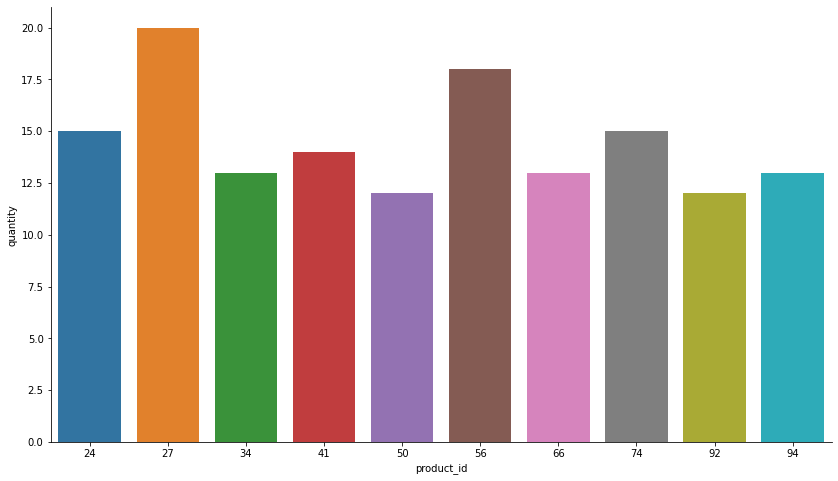

In [61]:
plt.figure(figsize = (14,8))
sns.barplot(data = df_for_barplot.head(10), x = 'product_id', y = 'quantity')
sns.despine()  # убрать боковые рамки

In [66]:
loc[row_label, column_label]
iloc[row_position, column_position]

NameError: name 'loc' is not defined

In [110]:
df.groupby('product_id', as_index = True) \
    .agg({"quantity":'sum'}) \
    .sort_values(by=['quantity'], ascending = True) \
    .loc[56, 'quantity']

18

Визуализируйте продажи по дням.


In [118]:
df_for_plt = df.groupby('date', as_index = False) \
    .agg({'quantity':'sum'})


df_for_plt

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


<AxesSubplot:xlabel='date'>

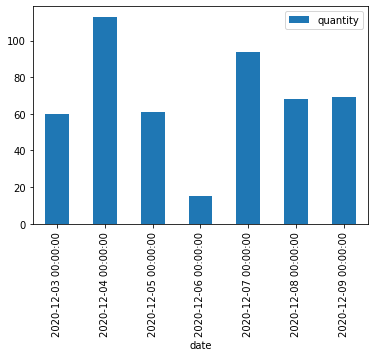

In [119]:
df.groupby('date', as_index = True) \
    .agg({'quantity':'sum'}).plot(kind = 'bar')   # можно так, но выглядит не очень

<AxesSubplot:xlabel='date', ylabel='quantity'>

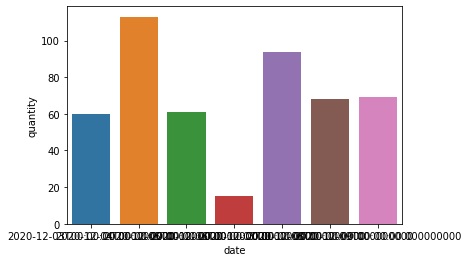

In [120]:
sns.barplot(y = 'quantity', x = 'date', data = df_for_plt) # не читабельно

In [121]:
df_for_plt['date'] = df_for_plt.date.dt.day
df_for_plt

,date,quantity
0,3,60
1,4,113
2,5,61
3,6,15
4,7,94
5,8,68
6,9,69


<AxesSubplot:xlabel='date', ylabel='quantity'>

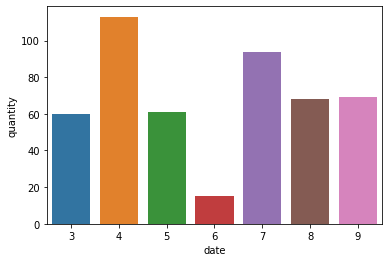

In [122]:
sns.barplot(y = 'quantity', x = 'date', data = df_for_plt)

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [132]:
df.groupby(['name', 'product_id'], as_index = False) \
    .agg({'quantity':'count'}) \
    .sort_values(by=['quantity']) \
    .query('quantity > 1')    # тут не учитывается, что в разные дни

,name,product_id,quantity
30,Alexey_Smirnov,55,2
92,Petr_Fedorov,94,2
37,Anton_Ivanov,15,2


In [135]:
df.groupby(['name', 'product_id']) \
   .agg({'date':pd.Series.nunique}) \
    .query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
